# UN GENERAL DEBATES
Transcriptions of general debates at the UN from 1970 to 2016

**About Dataset:**

**Context:**
Every year since 1947, representatives of UN member states gather at the annual sessions of the United Nations General Assembly. The centrepiece of each session is the General Debate. This is a forum at which leaders and other senior officials deliver statements that present their government’s perspective on the major issues in world politics. These statements are akin to the annual legislative state-of-the-union addresses in domestic politics. This dataset, the UN General Debate Corpus (UNGDC), includes the corpus of texts of General Debate statements from 1970 (Session 25) to 2016 (Session 71).

**Content:**
This dataset includes the text of each country’s statement from the general debate, separated by country, session and year and tagged for each. The text was scanned from PDFs of transcripts of the UN general sessions. As a result, the original scans included page numbers in the text from OCR (Optical character recognition) scans, which have been removed. This dataset only includes English.

**LOADING THE DATA:**

In [1]:
import pandas as pd
df = pd.read_csv('/Users/hepsiba/Downloads/un-general-debates-blueprint.csv')
df.head(20)

session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15       25  1970     DZA                          Algeria   
16       25  1970     ECU                          Ecuador   
17       25  1970     FRA                           France   
18       25  1970     GBR                   United Kingdom   
19       25  1970     GHA                            Ghana   

                  speaker    position  \
0                 Mr. NAS         NaN   
1      Mr. DE PABLO PARDO         NaN   
2             Mr. McMAHON         NaN   
3      Mr. KIRCHSCHLAEGER         NaN   
4              Mr. HARMEL         NaN   
5          Mr. GURINOVICH         NaN   
6      Mr. CAMACHO OMISTE         NaN   
7      Mr. GIBSON BARBOZA         NaN   
8               Mr. SHARP         NaN   
9              Mr. AHIDJO  President    
10            Mr. ICKONGA         NaN   
11  Mr. VASQUEZ CARRIZOSA         NaN   
12              Mr. FACIO         NaN   
13            Mr. ALARCON         NaN   
14        Mr FERNANDEZ G.               
15              Mr. YAZID         NaN   
16            Mr. Benites         NaN   
17           Mr. SCHUMANN         NaN   
18   Sir Alec DOUGLASHOME         NaN   
19              Mr. OWUSU         NaN   

                                                 text  
0   33: May I first convey to our President the co...  
1   177.\t : It is a fortunate coincidence that pr...  
2   100.\t  It is a pleasure for me to extend to y...  
3   155.\t  May I begin by expressing to Ambassado...  
4   176. No doubt each of us, before coming up to ...  
5   \n71.\t. We are today mourning the untimely de...  
6   135.\t  I wish to congratulate the President o...  
7   1.\tMr. President, I should like, first of all...  
8   \nThe General Assembly is fortunate indeed to ...  
9   : A year ago I came here as the Acting Preside...  
10  122.\t  I cannot begin my intervention without...  
11  Mr. President, this visit to the United Nation...  
12  62.\t  Mr. President, your election to the Pre...  
13  1.\t  Mr. President, I should first like to co...  
14  \n\n\n Mr. President, it was a source of great...  
15  1.  The delegation of Algeria is very pleased ...  
16  71.  It had been my hope that a loftier person...  
17  84.\t  Within one month, when we celebrate the...  
18  110.\t Mr. President, I should like first to s...  
19  121.\t I should like to begin by congratulatin...

**PRINTING THE COUPLE OF TEXTS:**

In [2]:
print(repr(df.iloc[2666]["text"][0:400]))
print(repr(df.iloc[4726]["text"][0:400]))

'\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further c'
'\ufeffI wish to join\nother representatives in congratulating you, Sir, on\nyour unanimous election as President of the fifty-sixth\nsession of the General Assembly. We are confident that\n27\n\nunder your able guidance the work of this General\nAssembly session will be another milestone on the new\ninternational scene, particularly in confronting the new\nchallenges facing our world, especially after the\nextre'


**SPLITTING INTO SENTENCES:**

In [3]:
import re
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

In [8]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


**START BY GETTING TFIDF:**

In [10]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

# Define the TfidfVectorizer with the stop words list
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape

/Users/hepsiba/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(7507, 24611)

**MAKING DATAFRAME OF SENTENCES:**

In [11]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["year"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text  year
0  33: May I first convey to our President the co...  1970
1  35.\tThe utilization of the United Nations to ...  1970
2  36.\tThe whole of progressive mankind recalls ...  1970
3  37.\tAll this has had well known consequences ...  1970
4  38.\tOne of the undeniable proofs that the Uni...  1970
5  39.\tUndoubtedly, such a state of affairs in t...  1970
6  40.\tThe liberation movement at the world leve...  1970
7  41.\tPanic-stricken at the impetuous growth of...  1970
8  42.\tAlthough split by numerous contradictions...  1970
9  43.\tIn that connexion we can cite, simultaneo...  1970

**GETTING THE TFIDF OF THE SENTENCES DF:**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define your TfidfVectorizer with appropriate parameters
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Fit and transform your text data to obtain the TF-IDF vectors
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])

# Check the shape of the TF-IDF vectors
tfidf_para_vectors.shape

(279076, 25156)

**NMF:**

In [17]:
from sklearn.decomposition import NMF

# Initialize NMF with a higher max_iter value
nmf_para_model = NMF(n_components=10, max_iter=200, random_state=42)

# Fit the NMF model to your data
W_nmf_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_nmf_para_matrix = nmf_para_model.components_

**10 TOPICS:**

In [22]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            # Updated to use the correct method for getting feature names
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

# Use get_feature_names_out() instead of get_feature_names()
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  co (0.79)
  operational (0.65)
  disarmament (0.36)
  nuclearization (0.34)
  relationship (0.25)

Topic 01
  terrorist (0.38)
  challenges (0.32)
  sustainably (0.30)
  millenniums (0.29)
  reformation (0.28)

Topic 02
  africa (1.15)
  african (0.82)
  southeast (0.63)
  namibian (0.36)
  delegation (0.30)

Topic 03
  arab (1.02)
  israel (0.89)
  palestinians (0.60)
  lebanon (0.54)
  israeli (0.54)

Topic 04
  american (0.33)
  america (0.31)
  latin (0.31)
  panamanian (0.21)
  bolivia (0.21)

Topic 05
  pacification (1.55)
  islands (1.23)
  solomons (0.86)
  island (0.82)
  fiji (0.71)

Topic 06
  sovietamerican (0.81)
  republican (0.78)
  nuclearization (0.68)
  vietnam (0.64)
  socialiste (0.63)

Topic 07
  guinea (4.26)
  equatorial (1.75)
  bissau (1.53)
  par (1.47)
  republican (0.57)

Topic 08
  european (0.61)
  europe (0.44)
  cooperation (0.39)
  bosnia (0.34)
  herzegovina (0.30)

Topic 09
  caribbean (0.98)
  smaller (0.66)
  bahamas (0.63)
  saints (0.6

**RUNNING THE SAME MODEL:**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)

# Fit and transform the data
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])

# Get feature names
feature_names = tfidf_para_vectorizer.get_feature_names_out()

# Display topics
display_topics(nmf_para_model, feature_names)


Topic 00
  interminably (2.01)
  workplaces (1.50)
  communists (0.91)
  neutrality (0.76)
  pax (0.67)

Topic 01
  gef (2.88)
  servility (2.85)
  assembly (2.83)
  moving (2.00)
  preserved (1.83)

Topic 02
  counties (4.41)
  devastatingly (2.49)
  ecological (1.51)
  devastated (1.35)
  tracing (0.92)

Topic 03
  nationality (5.61)
  uniquely (5.50)
  organisational (1.27)
  statehood (1.03)
  charted (0.93)

Topic 04
  npfl (4.91)
  wealthy (3.25)
  disappointments (2.01)
  treatable (1.70)
  projection (1.45)

Topic 05
  rightfully (6.51)
  hubs (6.20)
  resource (1.16)
  function (0.86)
  unitary (0.83)

Topic 06
  africa (3.80)
  sounds (3.30)
  african (1.70)
  nakba (1.38)
  apartheid (1.18)

Topic 07
  securely (6.08)
  cotton (5.82)
  periods (1.48)
  reflexes (1.47)
  pax (1.31)

Topic 08
  penny (1.35)
  pax (1.32)
  easier (1.28)
  microfinance (1.17)
  palace (1.15)

Topic 09
  devastation (4.51)
  suspicion (1.20)
  ecological (1.07)
  soberly (1.00)
  glut (0.94)


**BIGGEST TOPIC:**

Topic 01 was the biggest topic

In [27]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.06189432, 17.0213082 , 13.6565622 , 10.18695452, 11.35821532,
        5.95003141,  7.90001101,  4.13937503, 11.91132462,  6.81432338])

**TOPIC SIZES:**

In [28]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([10.43946386, 10.31059534, 10.19868842,  9.96283344,  6.62783788,
        7.35346496,  8.90303195,  8.30060472, 16.87409827, 11.02938115])

**LATENT DIRICHLET ALLOCATION (LDA):**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5,max_df=0.7)
count_para_vectors =count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

**START BY CUTTING THE PARAGRAPHS INTO SENTENCES:**

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords,min_df=5, max_df=0.7)
count_para_vectors =count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

(279076, 25160)

**RUNNING THE LDA:**

In [32]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

**DISPLAYING THE OUTPUT:**

In [35]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


Topic 00
  united (1.70)
  nations (1.59)
  countries (1.19)
  states (1.16)
  co (1.02)

Topic 01
  security (2.26)
  council (2.21)
  international (1.79)
  united (1.63)
  nations (1.60)

Topic 02
  nations (4.97)
  united (4.29)
  world (1.73)
  international (1.71)
  organization (1.35)

Topic 03
  general (4.43)
  assembly (3.50)
  session (3.29)
  mr (1.94)
  president (1.81)

Topic 04
  world (2.04)
  human (1.82)
  rights (1.47)
  international (0.90)
  political (0.85)

Topic 05
  peace (1.89)
  war (1.44)
  conflict (1.22)
  world (1.22)
  east (0.95)

Topic 06
  africa (4.04)
  african (2.39)
  south (2.30)
  development (1.38)
  international (1.24)

Topic 07
  countries (3.51)
  economic (2.32)
  development (2.20)
  developing (1.75)
  world (1.23)

Topic 08
  nuclear (2.79)
  weapons (2.06)
  international (1.86)
  disarmament (1.61)
  arms (1.29)

Topic 09
  people (2.96)
  government (1.43)
  republic (1.26)
  country (1.21)
  national (0.85)


**TOPIC SIZES:**

In [36]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 9.60679263, 10.10443478, 14.65039409,  8.22108189, 11.33524643,
       10.4328304 ,  6.9134357 , 13.0946485 ,  7.35746149,  8.28367408])

**pyLDAvis:**

In [48]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [58]:
def display_topics(model, vectorizer, no_top_words):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Assuming you already have the LDA model and vectorizer
# Replace lda_para_model with your LDA model and count_para_vectorizer with your vectorizer
display_topics(lda_para_model, count_para_vectorizer, no_top_words=10)

Topic 0:
united nations countries states co cooperation operation region european peace
Topic 1:
security council international united nations states non resolutions resolution peace
Topic 2:
nations united world international organization peace new security development human
Topic 3:
general assembly session mr president secretary palestinian like israel peace
Topic 4:
world human rights international political people peoples economic social new
Topic 5:
peace war conflict world east conflicts situation middle security international
Topic 6:
africa african south development international community government conference united support
Topic 7:
countries economic development developing world international developed trade resources financial
Topic 8:
nuclear weapons international disarmament arms states terrorism treaty conference convention
Topic 9:
people government republic country national democratic peoples independence struggle states


**WORDCLOUDS FOR 10TOPICS:**

In [68]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


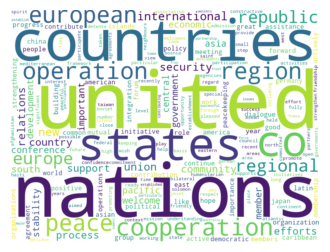

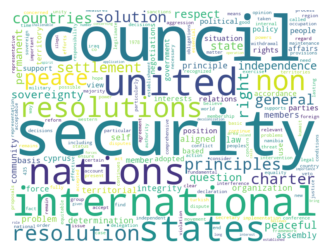

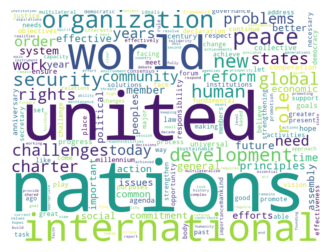

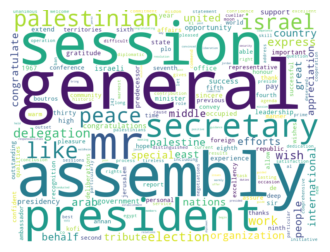

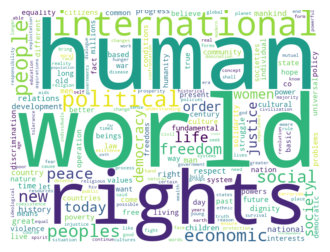

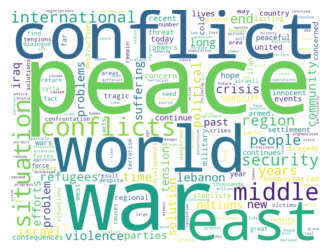

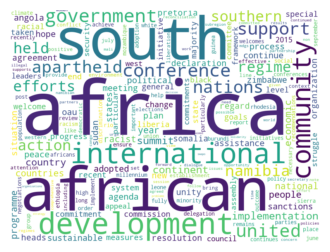

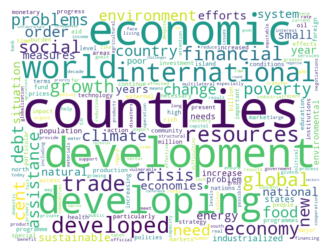

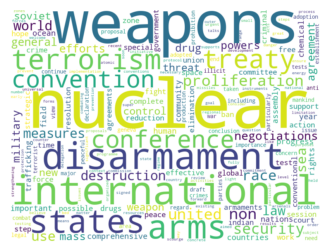

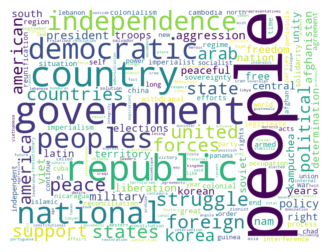

In [78]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def display_topics(lda_model, count_vectorizer, num_topics):
    feature_names = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.figure(figsize=(4, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.savefig(f'topic{topic_idx}.png')
        plt.show()

# Assuming you already have the LDA model and vectorizer
# Replace lda_para_model with your LDA model and count_para_vectorizer with your vectorizer
num_topics = 10  # Adjust this number as per your requirement
display_topics(lda_para_model, count_para_vectorizer, num_topics)

**NMF WORDCLOUDS:**

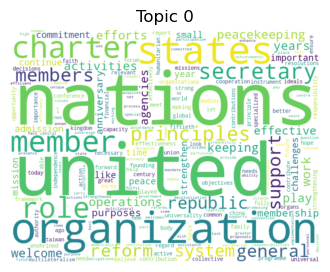

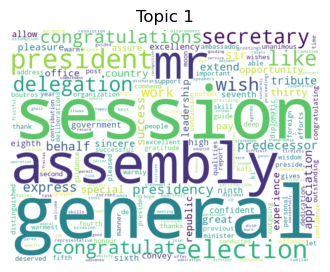

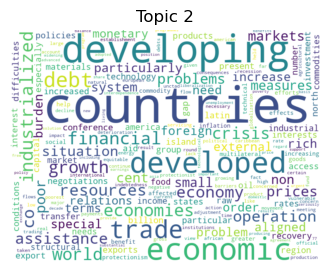

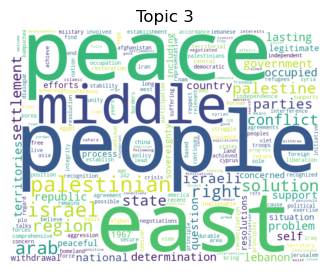

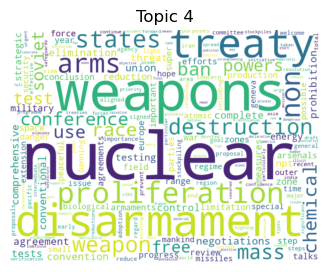

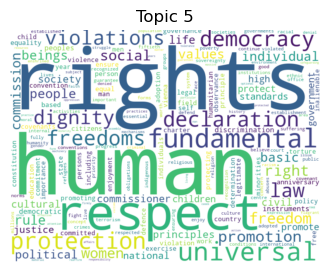

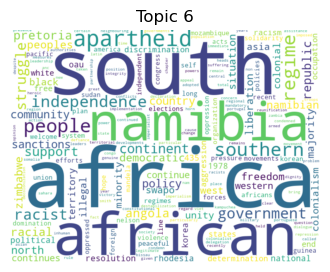

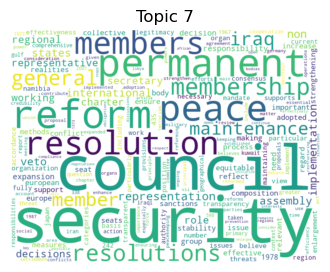

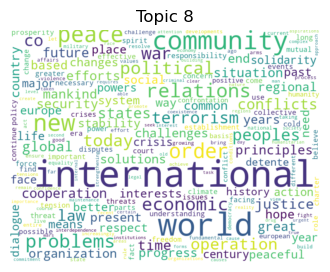

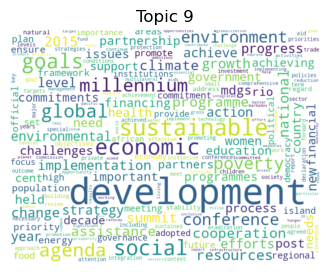

In [87]:
def wordcloud_topics(model, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.figure(figsize=(4, 6))  # Set the figure size here
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Assuming you already have the NMF model and vectorizer
# Replace nmf_para_model with your NMF model and tfidf_para_vectorizer with your vectorizer
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer)

**LDA WORDCLOUDS:**

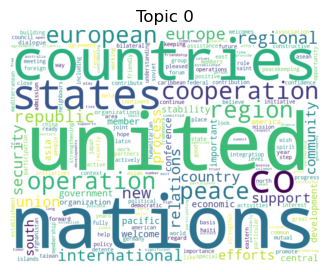

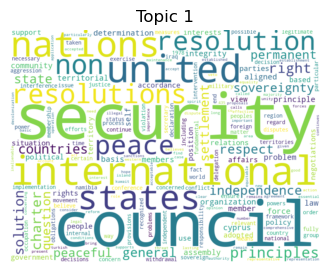

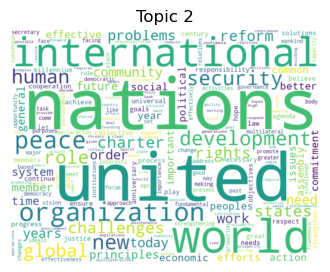

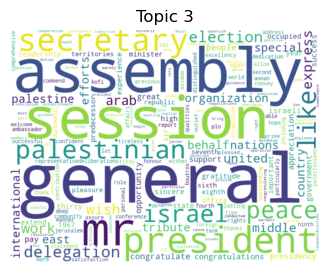

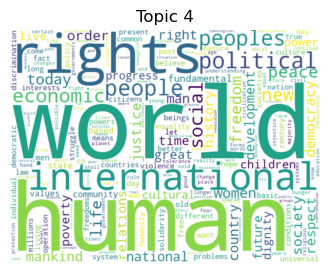

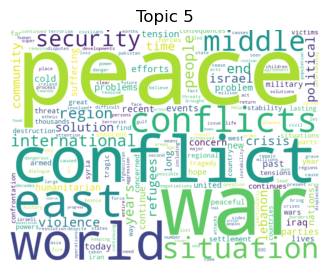

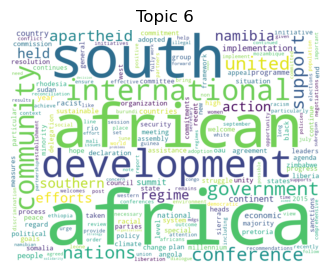

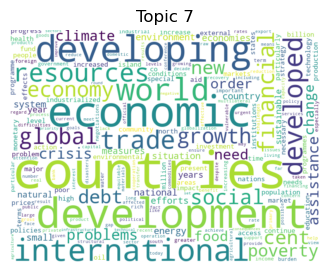

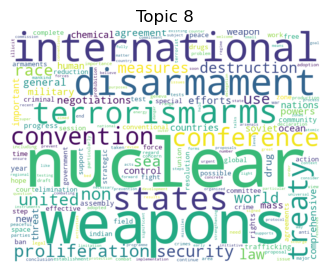

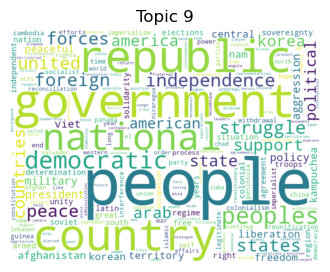

In [83]:
def wordcloud_topics(lda_model, vectorizer, num_topics=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(dict(zip(feature_names, topic)))
        plt.figure(figsize=(4, 6))  # Set the figure size here
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Assuming you already have the LDA model and vectorizer
# Replace lda_para_model with your LDA model and count_para_vectorizer with your vectorizer
wordcloud_topics(lda_para_model, count_para_vectorizer, num_topics=10)

**GIVING TOPIC NAMES BY JOINING TOP 2WORDS:**

In [89]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    topic_words = [voc[ind] for ind in important[-20:]]
    topic_names.append(" ".join(topic_words))
topic_names

['welcome efforts operations work peacekeeping system republic general reform support members principles secretary role member charter states organization united nations',
 'appreciation success sir predecessor behalf express work presidency congratulations wish congratulate secretary delegation like election president mr assembly session general',
 'poor prices problems assistance operation economy resources crisis co economies growth world financial industrialized debt trade developed economic developing countries',
 'problem lasting territories government israeli parties settlement conflict state palestine solution right region arab israel palestinian middle east peace people',
 'free soviet powers test use conference ban chemical race mass destruction weapon states non arms proliferation treaty disarmament weapons nuclear',
 'individual commission rule social women right freedom promotion law dignity violations freedoms declaration democracy protection universal fundamental respect

**SEPARATE DATA BY YEAR:**

In [90]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["year"]))):
    W_year =nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["year"] == year)])
    year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))

/Users/hepsiba/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/hepsiba/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/hepsiba/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/hepsiba/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipyke

  0%|          | 0/46 [00:00<?, ?it/s]

**TIME CHART:**

In [99]:
pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 6.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
Note: you may need to restart the kernel to use updated packages.


In [101]:
import plotly.graph_objs as go
import pandas as pd

# Assuming you have a DataFrame df_year with the data
# You can create a Plotly area plot as follows:

data = []
for column in df_year.columns:
    data.append(go.Scatter(x=df_year.index, y=df_year[column], mode='lines', stackgroup='one', name=column))

layout = go.Layout(
    title='Topic Distribution Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Topic Proportion'),
    showlegend=True,
    autosize=False,
    width=1600,
    height=900,
)

fig = go.Figure(data=data, layout=layout)
fig.show()

/Users/hepsiba/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/hepsiba/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

